In [11]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 6.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 4.4 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


# 1. Data

In [10]:
!pip install openpyxl

In [30]:
import pandas as pd

master_train_df = pd.read_csv('/workspaces/707-group-project-aadit2697/project-checkpoint2/master_data/all_seasons_v2 (1).csv')
master_train_df.shape

master_test_df= pd.read_excel('/workspaces/707-group-project-aadit2697/project-checkpoint2/master_data/season2023_testdata_mastertable.xlsx')
master_test_df.shape

(55164, 59)

In [31]:
master_train_df.shape

(481311, 59)

In [33]:
master_train_df.head()

,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN_x,FGM,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,6.5,0.545,0.546,0.357,0.360,109.99,106.60,88.83,60,0.182
1,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,6.3,0.417,0.478,0.195,0.198,106.36,102.23,85.20,65,0.087
2,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,13.3,0.545,0.528,0.263,0.270,111.96,107.26,89.38,47,0.145
3,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.0,0.625,0.625,0.121,0.119,106.92,101.30,84.41,58,0.089
4,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.0,0.545,0.545,0.169,0.175,100.63,99.02,82.52,59,0.089


- #### Renaming the cols

In [34]:
renamed_columns = {
    'Team_ID': 'team_id',
    'Game_ID': 'game_id',
    'PLAYER_ID': 'player_id',
    'GAME_DATE': 'game_date',
    'MATCHUP': 'matchup',
    'W': 'wins',
    'L': 'losses',
    'W_PCT': 'win_percentage',
    'MIN_x': 'minutes_played_team_level',
    'FGM': 'field_goals_made',
    'FGA': 'field_goals_attempted',
    'FG_PCT': 'field_goal_percentage',
    'FG3M': 'three_points_made',
    'FG3A': 'three_points_attempted',
    'FG3_PCT': 'three_point_percentage',
    'FTM': 'free_throws_made',
    'FTA': 'free_throws_attempted',
    'FT_PCT': 'free_throw_percentage',
    'OREB': 'offensive_rebounds',
    'DREB': 'defensive_rebounds',
    'REB': 'total_rebounds',
    'AST': 'assists',
    'STL': 'steals',
    'BLK': 'blocks',
    'TOV': 'turnovers',
    'PF': 'personal_fouls',
    'PTS': 'points',
    'TEAM_ABBREVIATION': 'team_abbreviation',
    'TEAM_CITY': 'team_city',
    'PLAYER_NAME': 'player_name',
    'NICKNAME': 'nickname',
    'START_POSITION': 'start_position',
    'COMMENT': 'comment',
    'MIN_y': 'minutes_played_player_level',
    'E_OFF_RATING': 'estimated_offensive_rating',
    'OFF_RATING': 'offensive_rating',
    'E_DEF_RATING': 'estimated_defensive_rating',
    'DEF_RATING': 'defensive_rating',
    'E_NET_RATING': 'estimated_net_rating',
    'NET_RATING': 'net_rating',
    'AST_PCT': 'assist_percentage',
    'AST_TOV': 'assist_to_turnover_ratio',
    'AST_RATIO': 'assist_ratio',
    'OREB_PCT': 'offensive_rebound_percentage',
    'DREB_PCT': 'defensive_rebound_percentage',
    'REB_PCT': 'rebound_percentage',
    'TM_TOV_PCT': 'team_turnover_percentage',
    'EFG_PCT': 'effective_field_goal_percentage',
    'TS_PCT': 'true_shooting_percentage',
    'USG_PCT': 'usage_percentage',
    'E_USG_PCT': 'estimated_usage_percentage',
    'E_PACE': 'estimated_pace',
    'PACE': 'pace', 
    'PACE_PER40': 'pace_per_40_minutes',
    'POSS': 'possessions',
    'PIE': 'player_impact_estimate',
    #'WL': 'win_loss'
}


In [35]:
master_train_df.rename(columns=renamed_columns, inplace=True)
master_train_df.head()

,team_id,game_id,game_date,matchup,WL,wins,losses,win_percentage,minutes_played_team_level,field_goals_made,...,team_turnover_percentage,effective_field_goal_percentage,true_shooting_percentage,usage_percentage,estimated_usage_percentage,estimated_pace,pace,pace_per_40_minutes,possessions,player_impact_estimate
0,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,6.5,0.545,0.546,0.357,0.360,109.99,106.60,88.83,60,0.182
1,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,6.3,0.417,0.478,0.195,0.198,106.36,102.23,85.20,65,0.087
2,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,13.3,0.545,0.528,0.263,0.270,111.96,107.26,89.38,47,0.145
3,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.0,0.625,0.625,0.121,0.119,106.92,101.30,84.41,58,0.089
4,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.0,0.545,0.545,0.169,0.175,100.63,99.02,82.52,59,0.089


In [8]:
master_train_df.head(2)

,team_id,game_id,game_date,matchup,win_loss,wins,losses,win_percentage,minutes_played_team_level,field_goals_made,...,team_turnover_percentage,effective_field_goal_percentage,true_shooting_percentage,usage_percentage,estimated_usage_percentage,estimated_pace,pace,pace_per_40_minutes,possessions,player_impact_estimate
0,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,6.5,0.545,0.546,0.357,0.360,109.99,106.60,88.83,60,0.182
1,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,6.3,0.417,0.478,0.195,0.198,106.36,102.23,85.20,65,0.087


In [6]:
master_test_df.rename(columns=renamed_columns, inplace=True)

- #### Data Visualisations

How does the average total points scored by a team affect a team's success?

For this research question, the team focused on a singular season's data due to the size of the data set we would have to work with otherwise. The season that was targeted for this analysis was the 2022-2023 season. The NBA finalists for this season was Denver Nuggets (DEN) and Miami Heat (MIA).
The Denver Nuggets were the NBA Champions of the 2022-2023 season.

In [36]:
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import leaguestandings
import nba_api as nba
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import playercareerstats, playergamelog, leaguedashptstats, leaguedashplayerstats, teamgamelog
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import leaguegamelog

In [4]:
# Dataframe that contains the players information
players_df = pd.DataFrame(players.get_players())
active_plyrs_df = players_df[players_df.is_active == True]
active_plyrs_list = active_plyrs_df.id.to_list()
 
# Dataframe that contains the teams information
teams_df = pd.DataFrame(teams.get_teams())
teams_list = teams_df['id'].astype(str)

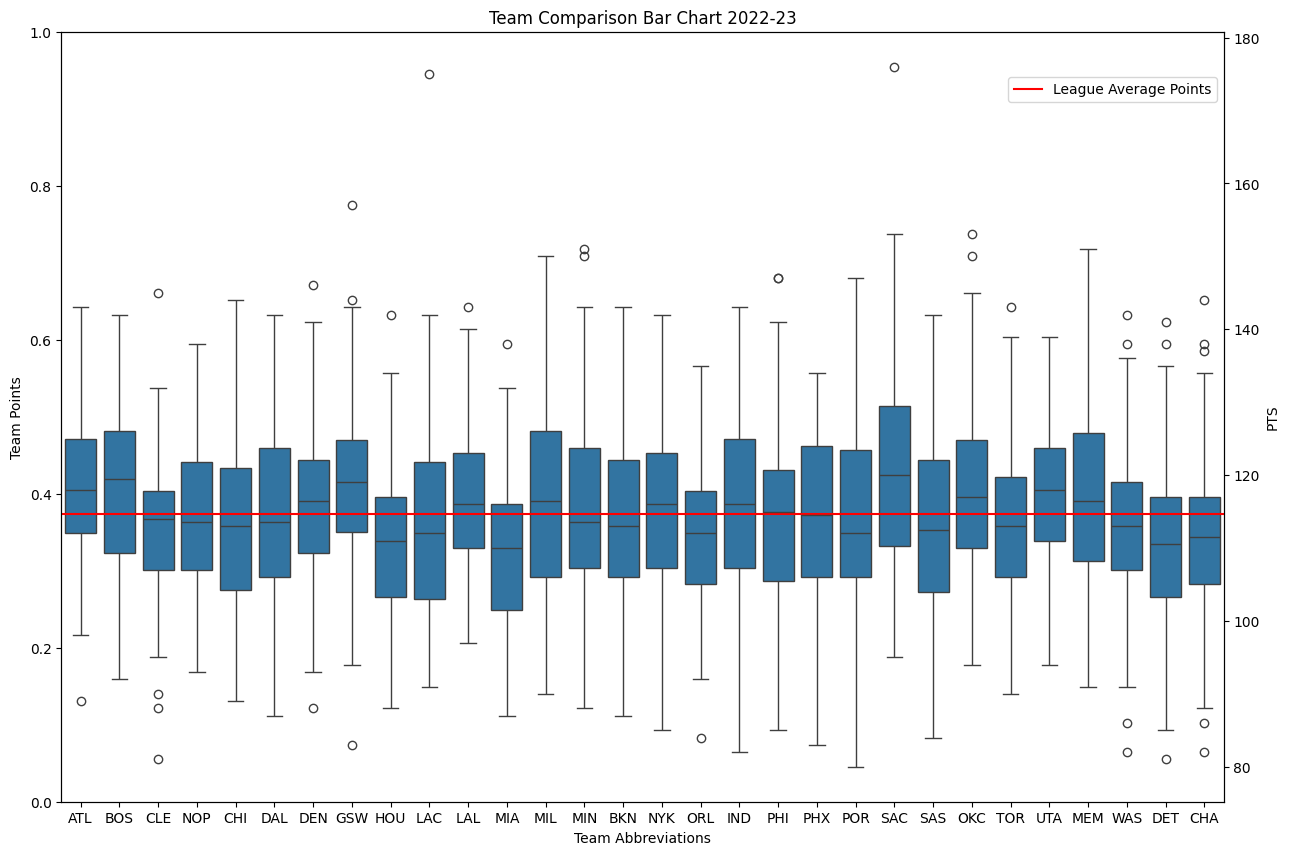

In [5]:
tgl_hdf = pd.read_hdf('hd5/tgl_df.h5')
 
# merging tgl_df dataframe with teams_df
complete_tgl_data = teams_df.merge(tgl_hdf, left_on = 'id', right_on = 'Team_ID')
 
# Creating a boxplot visualization to show average of points scored by each team for the 2022-23 season.
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
 
boxplot=sns.boxplot(x='abbreviation', y= 'PTS', data = complete_tgl_data)
 
# Adding a horizontal line representing League Average Points as a reference for each team's performance.
league_average = complete_tgl_data['PTS'].mean()
ax2.axhline(y=league_average, color='red', linestyle='-', label='League Average Points')
 
 
ax.set_title('Team Comparison Bar Chart 2022-23')
ax.set_xlabel('Team Abbreviations')
ax.set_ylabel('Team Points')
 
ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 0.95))
 
plt.show()

As seen in the box plot above, DEN's average points is above the league's average with regards to average points scored in the 2022-23 season. MIA's average points scored in that season is well below the league's average but they were still able to make an appearance in the championship series. However, we can see how DEN is a more offensively dominant team compared to MIA, suggesting that DEN is a high-scoring team while MIA is a low scoring team. There are two assumptions that can be made from the above observation.
 
> 1. DEN is a high-scoring team and in order to win, they would require outscoring their opponents or showcase defensive dominance. Since the team is focusing on the offensive influence of a team's success, we will be understanding DEN's field goal percentage to confirm if they are affected by their opponents defensive capabilities. If their field goal percentage is above 50%, it would confirm their offensive domination and the fact that their opponents' defensive capabilities do not affect the team's scoring abilities significantly.
 
> 2. MIA  is a low-scoring team and in order to win games, they would need to showcase defensive prowess in order to contain their opponents score to one that is lower than theirs.
 
From these assumptions, we can subset game log for DEN and MIA, and focus on their statistics against their opponents. For our next EDA, the team decided to understand what DEN's field goal percentage was with respect to their opponents in the same season.
 
> **Field Goal Percentage** represents the precentage of field goals made out of the total number of field goals attempted.

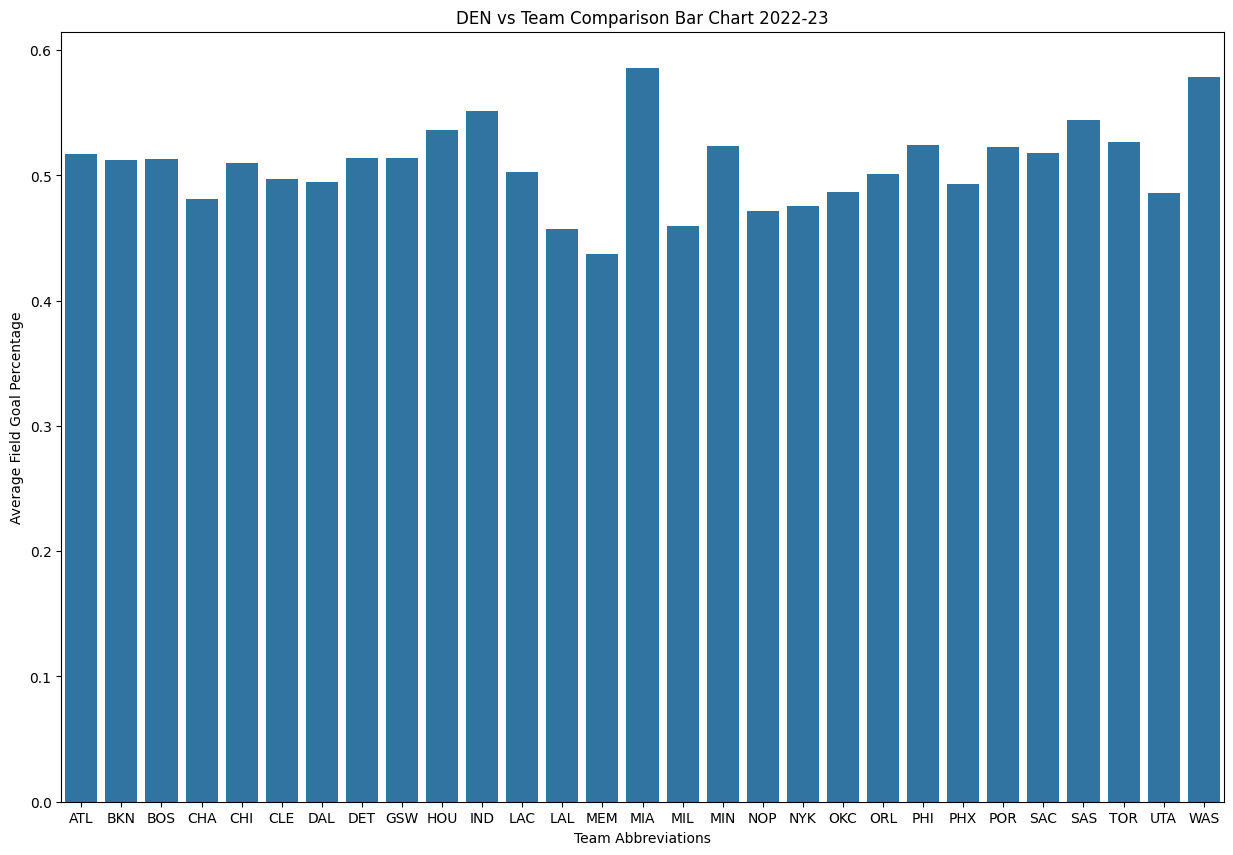

In [6]:
# Splitting the Matchup columns to pull opponent name for each team.
# The indicator column merely suggests if the team is playing at home court or away.
complete_tgl_data[['Team 1', 'Indicator', 'Team 2']] = complete_tgl_data['MATCHUP'].str.split(' ', expand = True)
 
# Then we are subsetting data for the championship winning team for the 2022-23 season (Denver Nuggets, DEN)
den_tgl_data = complete_tgl_data.set_index('abbreviation').loc['DEN']
 
fig, bx = plt.subplots(figsize=(15, 10))
barplot = sns.barplot(x = 'Team 2', y = 'FG_PCT',
                      data = den_tgl_data.groupby('Team 2')['FG_PCT'].mean().reset_index())
 
bx.set_title('DEN vs Team Comparison Bar Chart 2022-23')
bx.set_xlabel('Team Abbreviations')
bx.set_ylabel('Average Field Goal Percentage')
plt.show()

As seen in the graph, Denver Nuggets' field goal percentage is more than 50% against majority of the teams they have played against. This graph emphasizes DEN's offensive dominance further proving that the defense of other teams was simply not enough to reduce DEN's scoring abilities.

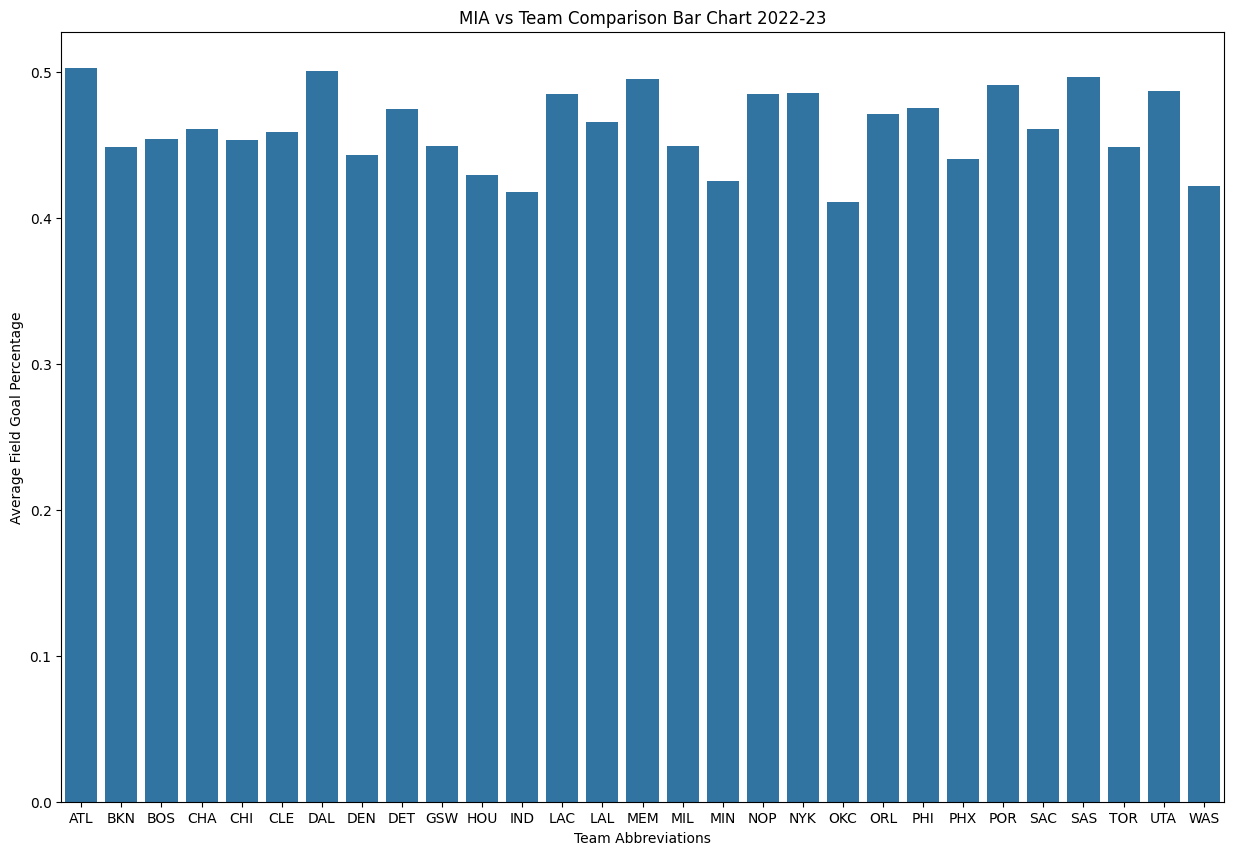

In [7]:
# Then we are subsetting data for the championship winning team for the 2022-23 season (Miami Heat, MIA)
mia_tgl_data = complete_tgl_data.set_index('abbreviation').loc['MIA']
 
fig, bx = plt.subplots(figsize=(15, 10))
barplot = sns.barplot(x = 'Team 2', y = 'FG_PCT',
                      data = mia_tgl_data.groupby('Team 2')['FG_PCT'].mean().reset_index())
 
bx.set_title('MIA vs Team Comparison Bar Chart 2022-23')
bx.set_xlabel('Team Abbreviations')
bx.set_ylabel('Average Field Goal Percentage')
plt.show()

As seen in the graph, Miami Heat's field goal percentage is less than 50% against majority of the teams they have played against. With a lower abilitiy to score, MIA requires their opponents to score less in order to win championships. This would mean that MIA would have to rely on defense. This graph confirms our previous assumption that MIA is a defensive team and has relied on defense to win games and qualify for the NBA championship.
 
This leads us to our next research question:
> Is a team's offensive domination a result of a players efficiency and the impact they create when they are playing on the court?
 
Below, we are accessing a players Plus/Minus Score to understand if it would be a key feature to a team's success.

In [12]:
from nba_api.stats.endpoints import playergamelog, commonallplayers
player_info = pd.DataFrame(players.get_active_players())
player_id = player_info['id']
 
# Getting team_IDs for teams that competed in the finals from 2022-23.
# finals_team_list = teams_df.loc[teams_df['abbreviation'].isin(['MIA','DEN'])]['id'].astype(str)
 
season = '2022-23'
 
# Getting nba finalists for 2022-23 season
all_players_df = pd.read_hdf('hd5/all_players_df.h5')
 
# Filtering players from DEN and MIA
nba_finalists_22023 = all_players_df[all_players_df['TEAM_ABBREVIATION'].isin(['MIA','DEN'])]

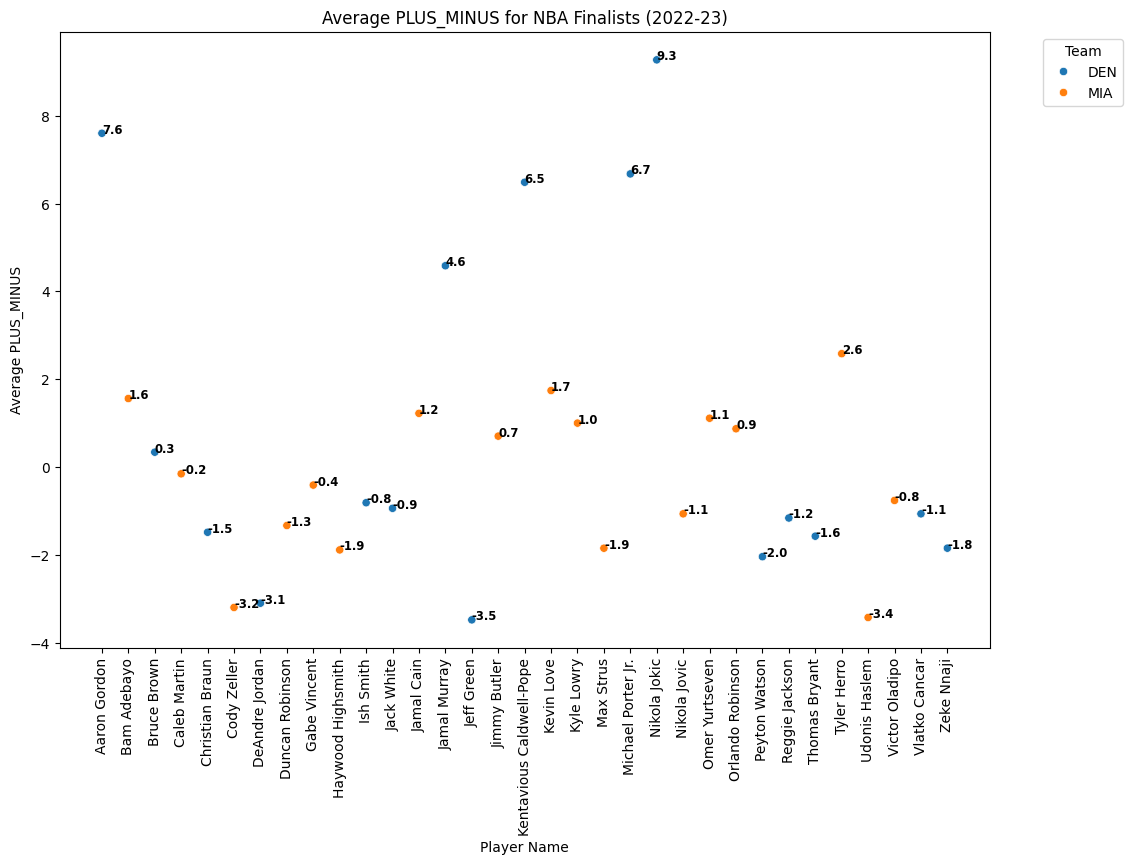

In [14]:
player_efficiency_hdf = pd.read_hdf('hd5//player_efficiency_df.h5')
 
complete_efficiency_df = nba_finalists_22023.merge(player_efficiency_hdf, left_on = 'PERSON_ID', right_on = 'Player_ID')
 
# Feature Engineering for Average PLUS_MINUS for each player
avg_plus_minus = complete_efficiency_df.groupby('DISPLAY_FIRST_LAST')['PLUS_MINUS'].mean().reset_index()
 
# Merging with original data to get 'TEAM_ABBREVIATION'
avg_plus_minus = avg_plus_minus.merge(complete_efficiency_df[['DISPLAY_FIRST_LAST', 'TEAM_ABBREVIATION']].drop_duplicates(), on='DISPLAY_FIRST_LAST')
 
# Creating a scatter plot to visualize average plus/minus scores for each player.
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='DISPLAY_FIRST_LAST', y='PLUS_MINUS', hue='TEAM_ABBREVIATION', data=avg_plus_minus)
 
for line in range(0, avg_plus_minus.shape[0]):
     scatter.text(avg_plus_minus['DISPLAY_FIRST_LAST'][line],
                   avg_plus_minus['PLUS_MINUS'][line],
                   round(avg_plus_minus['PLUS_MINUS'].iloc[line], 1),
                   horizontalalignment='left',
                   size='small',
                   color='black',
                   weight='semibold')
 
plt.title('Average PLUS_MINUS for NBA Finalists (2022-23)')
plt.xlabel('Player Name')
plt.ylabel('Average PLUS_MINUS')
plt.xticks(rotation=90)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
 
plt.show()

We can see in the scatter plot above that a handful of DEN players have a significantly higher mean PLUS/ MINUS score (efficiency score), emphasizing that their efficiency was greatly higher than those of MIA players. Logically, this made sense to the team. A team consisiting of higher efficiency scores would tend to be more successful in the span of 82 games.
 
However, the team did notice a trend with both teams:
 
> 1. DEN only had 5 players with a positive efficiency scores. Only 5 players were positively impacting the team's performance with 4 out of those 5 players having a mean efficiency score of significantly higher than 0. The team's success for the season, was influenced by 30% of the team. Having said that, it is evident that the 4 players with significantly high mean efficiency scores have great chemistry and perform extremely well when on the same team.
 
> 2. MIA on the other hand did not have players with high mean efficiency scores, but they had a much higher number of players with a positive mean efficiency score (8 players with positive efficiency). This could explain how MIA was able to win games throughout the season and qualify for the championship series. The team's success was a factor of 50% of the team performing efficiently.
 
From the above 2 trends, MIA seems like a more all-round team with above-average players who perform well when they play together while DEN seems like it relies on star power to be successful.
 
...
 
---
 
 
The team then decided to analyze a player's total points scored per season to understand the trend of scoring over the years. The seasons targeted for this analysis was from 2016 to 2023. The two players targeted for this analysis are Stephen Curry and LeBron James as they are high-scoring players. Since the datasets for both these players were not large, the team did not need to write data sets from FOR LOOPS to HD5 Files.

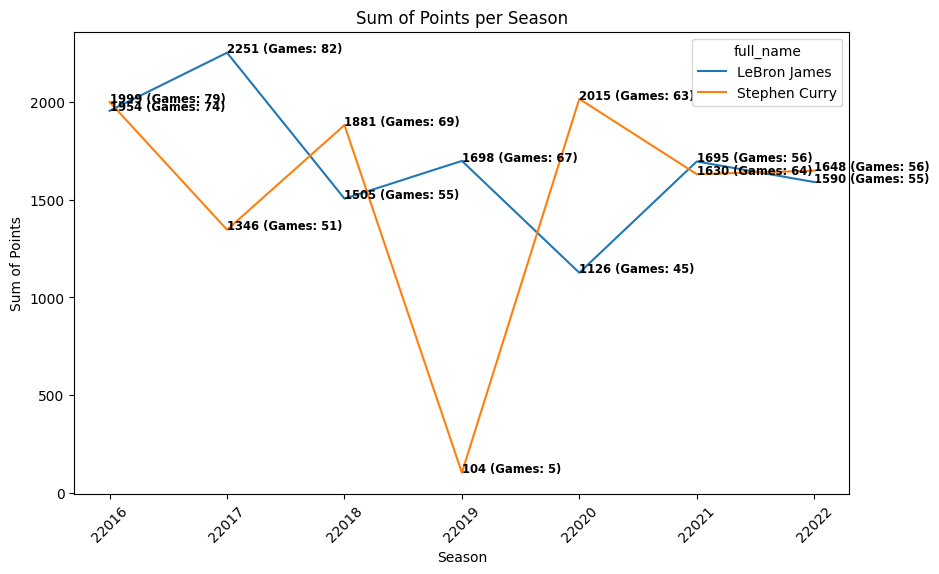

In [20]:
## Line Plot: Points Trend Over Time
 
from nba_api.stats.endpoints import playergamelog
import matplotlib.pyplot as plt
import seaborn as sns
 
# Finding Stephen Curry's Player_ID
sc_player_id = players_df.loc[players_df['full_name']=='Stephen Curry']['id'] #201939
 
lbj_player_id = ['2544']
 
# Defining the list of seasons the team is interested in
seasons = ['2016-17','2017-18','2018-19','2019-20','2020-21', '2021-22', '2022-23']
 
# Initialize an empty DataFrame to store the data
"""lbj_game_logs = pd.DataFrame()
 
# Looping through each season, fetching Stephen Curry game log data, and appending to the empty DataFrame
for season in seasons:
      game_log = playergamelog.PlayerGameLog(player_id=lbj_player_id, season=season)
      game_log_df = game_log.get_data_frames()[0]
      lbj_game_logs = lbj_game_logs.append(game_log_df, ignore_index=True)
""" 
lbj_game_logs= pd.read_hdf('hd5/lbj_game_logs.h5')

sc_game_logs= pd.read_hdf('hd5/sc_game_logs.h5')

"""sc_game_logs = pd.DataFrame()
 
# Looping through each season, fetching LeBron James game log data, and appending to the empty DataFrame
for season in seasons:
      game_log = playergamelog.PlayerGameLog(player_id=sc_player_id, season=season)
      game_log_df = game_log.get_data_frames()[0]
      sc_game_logs = sc_game_logs.append(game_log_df, ignore_index=True)"""
 
# Grouping by season and calculate the sum of points per season
active_players=pd.DataFrame(players.get_active_players())
 
sc_bio = active_players.loc[active_players['first_name'].isin(['Stephen'])]
sc_game_data = sc_game_logs.merge(sc_bio, left_on = 'Player_ID', right_on = 'id')
sc_games_played = sc_game_data.groupby(['SEASON_ID', 'full_name', 'Player_ID'])['Game_ID'].size().reset_index()
 
lbj_bio = active_players.loc[active_players['first_name'].isin(['LeBron'])]
lbj_game_data = lbj_game_logs.merge(lbj_bio, left_on = 'Player_ID', right_on = 'id')
lbj_games_played = lbj_game_data.groupby(['SEASON_ID', 'full_name','Player_ID'])['Game_ID'].size().reset_index()
 
# Feature Engineering number of games played by each player for each season.
games_played = pd.concat([lbj_games_played,sc_games_played], ignore_index=True)
games_played
 
sc_lbj_game_logs = pd.concat([lbj_game_logs,sc_game_logs], ignore_index=True)
sc_lbj_bio = active_players.loc[active_players['first_name'].isin(['LeBron', 'Stephen'])]
sc_lbj_game_logs = sc_lbj_game_logs.merge(sc_lbj_bio, left_on = 'Player_ID', right_on = 'id')
 
sum_pts_per_season = sc_lbj_game_logs.groupby(['SEASON_ID', 'Player_ID'])['PTS'].sum().reset_index()
games_played_sorted = games_played.sort_values(by='SEASON_ID', ascending=True)
sum_pts_per_season = sum_pts_per_season.merge(games_played_sorted)
 
# Creating a line graph for the sum of points per season
fig, ax = plt.subplots(figsize=(10, 6))
lineplot = sns.lineplot(x='SEASON_ID', y='PTS', data=sum_pts_per_season, hue = 'full_name')
for line in range(0, sum_pts_per_season.shape[0]):
     lineplot.text(sum_pts_per_season['SEASON_ID'][line],
                   sum_pts_per_season['PTS'][line],
                   f"{round(sum_pts_per_season['PTS'].iloc[line], 1)} (Games: {sum_pts_per_season['Game_ID'].iloc[line]})",
                   horizontalalignment='left',
                   size='small',
                   color='black',
                   weight='semibold')
ax.set_title('Sum of Points per Season')
ax.set_xlabel('Season')
ax.set_ylabel('Sum of Points')
plt.xticks(rotation=45)
plt.show()

Upon plotting the graph of total points scored for each year for LeBron James and Stephen Curry, the team noticed something interesting with respect to the data. In season 22019, the team saw a significant drop in points for Stephen Curry. Stephen Curry scored a total of 104 points while LeBron James scored a total of 1698 points that season. This seemed like an anomaly at first but when including 'total number of games' played by each player in a given season, the data seemed to evolve logically. In the 22019 season (2019-2020), Stephen Curry only played 5 out of 82 games, averaging 20.8 points that season. Lebron James on the other hand, played 67 out 82 games that season, averaging 25.3 points per game that season. This seemed to be a better performance indicator for each player.
 
This was an important realization for the team as we realized the importance of predicting 'points per game' for a player, instead of prediciting total points scored by a player for a given season. We understood that feature engineering 'points per game' for each player would remove the bias of players not playing due to injuries, or any other circumstance affecting a players' game time.
 
The team also noticed an incredible feat of athleticism from LeBron James in the 22017 season where he played in every single game (82 games) in the 2017-2018 season. While this particular data does not affect our objective, it was an impressive piece of statistic with respect to LeBron James' career.

Creating Seasons category from Game Date

In [37]:
import numpy as np
 
# Step 1: Determine the Season Year
# Create a new column 'season_year' to identify the season based on the 'GAME_DATE'

master_train_df['game_date'] = pd.to_datetime(master_train_df['game_date'], format='%b %d, %Y')

master_train_df['season_year'] = np.where(master_train_df['game_date'].dt.month >= 10, 
                                      master_train_df['game_date'].dt.year, 
                                      master_train_df['game_date'].dt.year - 1)
 
# Step 2: Map each season year to a unique season identifier
# First, get the sorted unique season years
unique_season_years = master_train_df['season_year'].unique()
unique_season_years.sort()
 
# Create a mapping from season years to "Season1", "Season2", etc.
season_mapping = {year: f'Season-{i+1}' for i, year in enumerate(unique_season_years)}
 
# Map the 'season_year' to the new 'Seasons' column using the mapping
master_train_df['seasons'] = master_train_df['season_year'].map(season_mapping)
 
# Example output
master_train_df[['game_date', 'season_year', 'seasons']].tail(5)

,game_date,season_year,seasons
481306,2022-10-19,2022,Season-8
481307,2022-10-19,2022,Season-8
481308,2022-10-19,2022,Season-8
481309,2022-10-19,2022,Season-8
481310,2022-10-19,2022,Season-8


#### Feature to check whether it was a home/away game

In [39]:
master_train_df['home_away'] = master_train_df['matchup'].apply(lambda x: 1 if "vs." in x else 0)

#master_df[[ 'season_year', 'home_away']]

In [40]:
master_train_df.home_away.value_counts()

home_away
0    240662
1    240649
Name: count, dtype: int64

#### Dropping unwanted columns

In [17]:
master_train_df.columns

Index(['team_id', 'game_id', 'game_date', 'matchup', 'win_loss', 'wins',
       'losses', 'win_percentage', 'minutes_played_team_level',
       'field_goals_made', 'field_goals_attempted', 'field_goal_percentage',
       'three_points_made', 'three_points_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throws_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 'assists',
       'steals', 'blocks', 'turnovers', 'personal_fouls', 'points', 'GAME_ID',
       'TEAM_ID', 'team_abbreviation', 'team_city', 'player_id', 'player_name',
       'nickname', 'start_position', 'comment', 'minutes_played_player_level',
       'estimated_offensive_rating', 'offensive_rating',
       'estimated_defensive_rating', 'defensive_rating',
       'estimated_net_rating', 'net_rating', 'assist_percentage',
       'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'r

In [18]:
master_train_df.drop(columns=['player_id', 'player_name', 'team_id', 'game_id',
       'nickname', 'start_position', 'comment', 'minutes_played_player_level',
       'estimated_offensive_rating', 'offensive_rating',
       'estimated_defensive_rating', 'defensive_rating',
       'estimated_net_rating', 'net_rating', 'assist_percentage',
       'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'estimated_usage_percentage', 'estimated_pace',
       'pace', 'pace_per_40_minutes', 'possessions', 'player_impact_estimate', 'game_date','matchup'], inplace=True)


In [20]:
master_train_df.drop(['wins','losses'], axis=1, inplace=True)

In [41]:
master_train_df.columns

Index(['team_id', 'game_id', 'game_date', 'matchup', 'WL', 'wins', 'losses',
       'win_percentage', 'minutes_played_team_level', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_points_made',
       'three_points_attempted', 'three_point_percentage', 'free_throws_made',
       'free_throws_attempted', 'free_throw_percentage', 'offensive_rebounds',
       'defensive_rebounds', 'total_rebounds', 'assists', 'steals', 'blocks',
       'turnovers', 'personal_fouls', 'points', 'GAME_ID', 'TEAM_ID',
       'team_abbreviation', 'team_city', 'player_id', 'player_name',
       'nickname', 'start_position', 'comment', 'minutes_played_player_level',
       'estimated_offensive_rating', 'offensive_rating',
       'estimated_defensive_rating', 'defensive_rating',
       'estimated_net_rating', 'net_rating', 'assist_percentage',
       'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound

In [24]:
master_train_df.season_year.unique()
master_train_df.seasons.unique()

array(['Season-6', 'Season-5', 'Season-7', 'Season-8', 'Season-1',
       'Season-2', 'Season-3', 'Season-4'], dtype=object)

In [25]:
master_train_df.drop(['GAME_ID','TEAM_ID','team_abbreviation','team_city','season_year'], axis=1, inplace=True)

In [29]:
master_train_df[master_train_df.duplicated()]

,win_loss,win_percentage,minutes_played_team_level,field_goals_made,field_goals_attempted,field_goal_percentage,three_points_made,three_points_attempted,three_point_percentage,free_throws_made,...,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,seasons,home_away
1,W,0.583,240,45,96,0.469,11,35,0.314,9,...,34,42,30,14,5,9,16,110,Season-6,0
2,W,0.583,240,45,96,0.469,11,35,0.314,9,...,34,42,30,14,5,9,16,110,Season-6,0
3,W,0.583,240,45,96,0.469,11,35,0.314,9,...,34,42,30,14,5,9,16,110,Season-6,0
4,W,0.583,240,45,96,0.469,11,35,0.314,9,...,34,42,30,14,5,9,16,110,Season-6,0
5,W,0.583,240,45,96,0.469,11,35,0.314,9,...,34,42,30,14,5,9,16,110,Season-6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481306,W,1.000,240,48,94,0.511,13,29,0.448,20,...,37,51,26,7,10,15,20,129,Season-8,0
481307,W,1.000,240,48,94,0.511,13,29,0.448,20,...,37,51,26,7,10,15,20,129,Season-8,0
481308,W,1.000,240,48,94,0.511,13,29,0.448,20,...,37,51,26,7,10,15,20,129,Season-8,0
481309,W,1.000,240,48,94,0.511,13,29,0.448,20,...,37,51,26,7,10,15,20,129,Season-8,0


In [27]:
master_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481311 entries, 0 to 481310
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   win_loss                   481311 non-null  object 
 1   win_percentage             481311 non-null  float64
 2   minutes_played_team_level  481311 non-null  int64  
 3   field_goals_made           481311 non-null  int64  
 4   field_goals_attempted      481311 non-null  int64  
 5   field_goal_percentage      481311 non-null  float64
 6   three_points_made          481311 non-null  int64  
 7   three_points_attempted     481311 non-null  int64  
 8   three_point_percentage     481311 non-null  float64
 9   free_throws_made           481311 non-null  int64  
 10  free_throws_attempted      481311 non-null  int64  
 11  free_throw_percentage      481311 non-null  float64
 12  offensive_rebounds         481311 non-null  int64  
 13  defensive_rebounds         48

In [64]:
master_df_dummies= pd.get_dummies(master_df)

#### Building a base model

In [65]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor  # For regression problems
from sklearn.ensemble import RandomForestClassifier # For classification problems
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd

# Assuming you have a dataset stored in a pandas DataFrame
# X contains features and y contains target variable
X = master_df.drop(columns=['win_loss'])
y = master_df['win_loss']


# X_dummies= pd.get_dummies(X)


In [66]:
test_data= pd.read_excel('master_data/season2023_testdata_mastertable.xlsx')
test_data.head()

,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN_x,FGM,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,7.1,0.500,0.500,0.105,0.106,100.58,95.87,79.89,76,0.034
1,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,5.0,0.500,0.632,0.241,0.245,95.28,94.43,78.69,66,0.105
2,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,0.0,0.500,0.533,0.194,0.203,95.28,94.97,79.14,50,0.127
3,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,0.0,0.615,0.595,0.153,0.158,95.65,95.60,79.67,72,0.066
4,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,11.9,0.481,0.514,0.330,0.334,98.28,93.66,78.05,78,0.150


In [67]:
test_data.rename(columns=renamed_columns, inplace=True)
test_data.head()

,team_id,game_id,game_date,matchup,win_loss,wins,losses,win_percentage,minutes_played_team_level,field_goals_made,...,team_turnover_percentage,effective_field_goal_percentage,true_shooting_percentage,usage_percentage,estimated_usage_percentage,estimated_pace,pace,pace_per_40_minutes,possessions,player_impact_estimate
0,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,7.1,0.500,0.500,0.105,0.106,100.58,95.87,79.89,76,0.034
1,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,5.0,0.500,0.632,0.241,0.245,95.28,94.43,78.69,66,0.105
2,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,0.0,0.500,0.533,0.194,0.203,95.28,94.97,79.14,50,0.127
3,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,0.0,0.615,0.595,0.153,0.158,95.65,95.60,79.67,72,0.066
4,1610612737,22301010,"MAR 21, 2024",ATL @ PHX,L,30.0,39.0,0.435,240,40,...,11.9,0.481,0.514,0.330,0.334,98.28,93.66,78.05,78,0.150


In [50]:
test_data['game_date'] = pd.to_datetime(test_data['game_date'], format='%b %d, %Y')

"""test_data['season_year'] = np.where(test_data['game_date'].dt.month >= 10, 
                                      test_data['game_date'].dt.year, 
                                      test_data['game_date'].dt.year - 1)"""
 
# Step 2: Map each season year to a unique season identifier
# First, get the sorted unique season years
#unique_season_years = test_data['season_year'].unique()
#unique_season_years.sort()
 
# Create a mapping from season years to "Season1", "Season2", etc.
#season_mapping = {year: f'Season-{i+1}' for i, year in enumerate(unique_season_years)}
 
# Map the 'season_year' to the new 'Seasons' column using the mapping
#test_data['seasons'] = test_data['season_year'].map(season_mapping)
 
# Example output
#test_data[['game_date', 'season_year', 'seasons']].tail(5)

,game_date,season_year,seasons
55159,2023-10-25,2023,NaN
55160,2023-10-25,2023,NaN
55161,2023-10-25,2023,NaN
55162,2023-10-25,2023,NaN
55163,2023-10-25,2023,NaN


In [69]:
test_data['home_away'] = test_data['matchup'].apply(lambda x: 1 if "vs." in x else 0)

test_data[[ 'home_away']].head()

,home_away
0,0
1,0
2,0
3,0
4,0


In [70]:
y_test = test_data.win_loss
test_data.drop(columns=['player_id', 'player_name',
       'nickname', 'start_position', 'comment', 'minutes_played_player_level',
       'estimated_offensive_rating', 'offensive_rating',
       'estimated_defensive_rating', 'defensive_rating',
       'estimated_net_rating', 'net_rating', 'assist_percentage',
       'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'estimated_usage_percentage', 'estimated_pace',
       'pace', 'pace_per_40_minutes', 'possessions', 'player_impact_estimate', 'game_date', 'matchup', 'win_loss'], inplace=True)


In [71]:
test_data_dummies= pd.get_dummies(test_data)

In [ ]:
%%capture
# Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

X_train = X_dummies
X_test = test_data_dummies
y_train = y

# Initializing the Random Forest model
# For regression:
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# For classification:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model (for regression)
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Evaluating the model (for classification)
print("Accuracy:", accuracy_score(y_test, y_pred))